# Motor Imagery Classification via Natus

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt
import pandas as pd

In [6]:
timestamp = "20240731_211756"
csv_file_path = f"../clients/logs/motor_imagery/data_{timestamp}.csv"

df = pd.read_csv(csv_file_path)

In [8]:
df

samplestamps       stim  Chan000  Chan001  Chan002  Chan003  Chan004  \
0            147517        NaN    447.0    447.0    447.0    447.0    447.0   
1            147518        NaN    444.0    444.0    444.0    444.0    444.0   
2            147519        NaN    440.0    440.0    440.0    440.0    440.0   
3            147520        NaN    437.0    437.0    437.0    437.0    437.0   
4            147521        NaN    434.0    434.0    434.0    434.0    434.0   
...             ...        ...      ...      ...      ...      ...      ...   
31245        178762  Left Hand      1.0      1.0      1.0      1.0      1.0   
31246        178763  Left Hand      2.0      2.0      2.0      2.0      2.0   
31247        178764  Left Hand      2.0      2.0      2.0      2.0      2.0   
31248        178765  Left Hand      2.0      2.0      2.0      2.0      2.0   
31249        178766  Left Hand      3.0      3.0      3.0      3.0      3.0   

       Chan005  Chan006  Chan007  ...  Chan022  Chan023  Chan024  Chan025  \
0        447.0    447.0    447.0  ...    447.0    447.0    447.0    447.0   
1        444.0    444.0    444.0  ...    444.0    444.0    444.0    444.0   
2        440.0    440.0    440.0  ...    440.0    440.0    440.0    440.0   
3        437.0    437.0    437.0  ...    437.0    437.0    437.0    437.0   
4        434.0    434.0    434.0  ...    434.0    434.0    434.0    434.0   
...        ...      ...      ...  ...      ...      ...      ...      ...   
31245      1.0      1.0      1.0  ...      1.0      1.0      1.0      1.0   
31246      2.0      2.0      2.0  ...      2.0      2.0      2.0      2.0   
31247      2.0      2.0      2.0  ...      2.0      2.0      2.0      2.0   
31248      2.0      2.0      2.0  ...      2.0      2.0      2.0      2.0   
31249      3.0      3.0      3.0  ...      3.0      3.0      3.0      3.0   

       Chan026  Chan027  Chan028  Chan029  Chan030  Chan031  
0        447.0    447.0    447.0    447.0    447.0    447.0  
1        444.0    444.0    444.0    444.0    444.0    444.0  
2        440.0    440.0    440.0    440.0    440.0    440.0  
3        437.0    437.0    437.0    437.0    437.0    437.0  
4        434.0    434.0    434.0    434.0    434.0    434.0  
...        ...      ...      ...      ...      ...      ...  
31245      1.0      1.0      1.0      1.0      1.0      1.0  
31246      2.0      2.0      2.0      2.0      2.0      2.0  
31247      2.0      2.0      2.0      2.0      2.0      2.0  
31248      2.0      2.0      2.0      2.0      2.0      2.0  
31249      3.0      3.0      3.0      3.0      3.0      3.0  

[31250 rows x 34 columns]

In [33]:
df = df.dropna(subset=["stim"])

In [32]:
df

samplestamps       stim  Chan000  Chan001  Chan002  Chan003  Chan004  \
2250         149767   fixation      3.0      3.0      3.0      3.0      3.0   
2251         149768   fixation      3.0      3.0      3.0      3.0      3.0   
2252         149769   fixation      4.0      4.0      4.0      4.0      4.0   
2253         149770   fixation      4.0      4.0      4.0      4.0      4.0   
2254         149771   fixation      4.0      4.0      4.0      4.0      4.0   
...             ...        ...      ...      ...      ...      ...      ...   
31245        178762  Left Hand      1.0      1.0      1.0      1.0      1.0   
31246        178763  Left Hand      2.0      2.0      2.0      2.0      2.0   
31247        178764  Left Hand      2.0      2.0      2.0      2.0      2.0   
31248        178765  Left Hand      2.0      2.0      2.0      2.0      2.0   
31249        178766  Left Hand      3.0      3.0      3.0      3.0      3.0   

       Chan005  Chan006  Chan007  ...  Chan022  Chan023  Chan024  Chan025  \
2250       3.0      3.0      3.0  ...      3.0      3.0      3.0      3.0   
2251       3.0      3.0      3.0  ...      3.0      3.0      3.0      3.0   
2252       4.0      4.0      4.0  ...      4.0      4.0      4.0      4.0   
2253       4.0      4.0      4.0  ...      4.0      4.0      4.0      4.0   
2254       4.0      4.0      4.0  ...      4.0      4.0      4.0      4.0   
...        ...      ...      ...  ...      ...      ...      ...      ...   
31245      1.0      1.0      1.0  ...      1.0      1.0      1.0      1.0   
31246      2.0      2.0      2.0  ...      2.0      2.0      2.0      2.0   
31247      2.0      2.0      2.0  ...      2.0      2.0      2.0      2.0   
31248      2.0      2.0      2.0  ...      2.0      2.0      2.0      2.0   
31249      3.0      3.0      3.0  ...      3.0      3.0      3.0      3.0   

       Chan026  Chan027  Chan028  Chan029  Chan030  Chan031  
2250       3.0      3.0      3.0      3.0      3.0      3.0  
2251       3.0      3.0      3.0      3.0      3.0      3.0  
2252       4.0      4.0      4.0      4.0      4.0      4.0  
2253       4.0      4.0      4.0      4.0      4.0      4.0  
2254       4.0      4.0      4.0      4.0      4.0      4.0  
...        ...      ...      ...      ...      ...      ...  
31245      1.0      1.0      1.0      1.0      1.0      1.0  
31246      2.0      2.0      2.0      2.0      2.0      2.0  
31247      2.0      2.0      2.0      2.0      2.0      2.0  
31248      2.0      2.0      2.0      2.0      2.0      2.0  
31249      3.0      3.0      3.0      3.0      3.0      3.0  

[29000 rows x 34 columns]

In [34]:
stimuli = df["stim"].to_numpy()
eeg_data = np.array([df[key].to_numpy() for key in df.keys() if "Chan" in key])

In [ ]:
eeg_data = eeg_data[:4, :] # just get the first 4 channels

## Epoch the Data

In [35]:
# Segments data into trials (fixation + left/right hand stimulus) and returns the indices of each trial

trial_idxs = []
trial = []
new_trial = True

for i, stim in enumerate(stimuli):
    if stim is None:
        continue

    if new_trial:
        if stim == "fixation":
            trial.append(i)
        else:
            new_trial = False

    if not new_trial:
        if stim == "Right Hand" or stim == "Left Hand":
            trial.append(i)
        elif stim == "fixation":
            new_trial = True
            trial_idxs.append(trial)
            trial = []
            trial.append(i)
        else:
            raise ValueError(f"Unknown stimuli: {stim}")
        
trial_idxs.append(trial)

In [50]:
# Segment EEG data into trials
X = []
y = []

for idx in trial_idxs:
    X.append(eeg_data[:, idx])
    y.append(stimuli[idx[-1]])

y = [0 if stim == "Right Hand" else 1 for stim in y]

## Frequency Band the Data

In [57]:
def wavelet_transform(eeg_signal, fs):
    # Define wavelet parameters
    wavelet = 'cmor1.5-1.0'  # Complex Morlet wavelet
    scales = np.arange(1, 128)
    
    # Perform Continuous Wavelet Transform (CWT)
    coefficients, frequencies = pywt.cwt(eeg_signal, scales, wavelet, sampling_period=1/fs)
    
    return coefficients, frequencies

In [58]:
freq_band_eeg = []

for trial_eeg in X:
    coefficients, freqs = wavelet_transform(trial_eeg, 1024)

    bands = {
        'Delta': (0.5, 4),
        'Theta': (4, 8),
        'Alpha': (8, 13),
        'Beta': (13, 30),
        'Gamma': (30, 100)
    }
    
    band_signals = {}
    for band, (low_freq, high_freq) in bands.items():
        # Find the indices of frequencies within the band
        idx_band = np.logical_and(freqs >= low_freq, freqs <= high_freq)
        band_signals[band] = coefficients[idx_band, :, :].mean(axis=0)
    
    freq_band_eeg.append(band_signals)

C:\Users\danie\AppData\Local\Temp\ipykernel_19092\2984609304.py:18: RuntimeWarning: Mean of empty slice.
  band_signals[band] = coefficients[idx_band, :, :].mean(axis=0)
c:\Users\danie\miniconda3\envs\zeromq\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


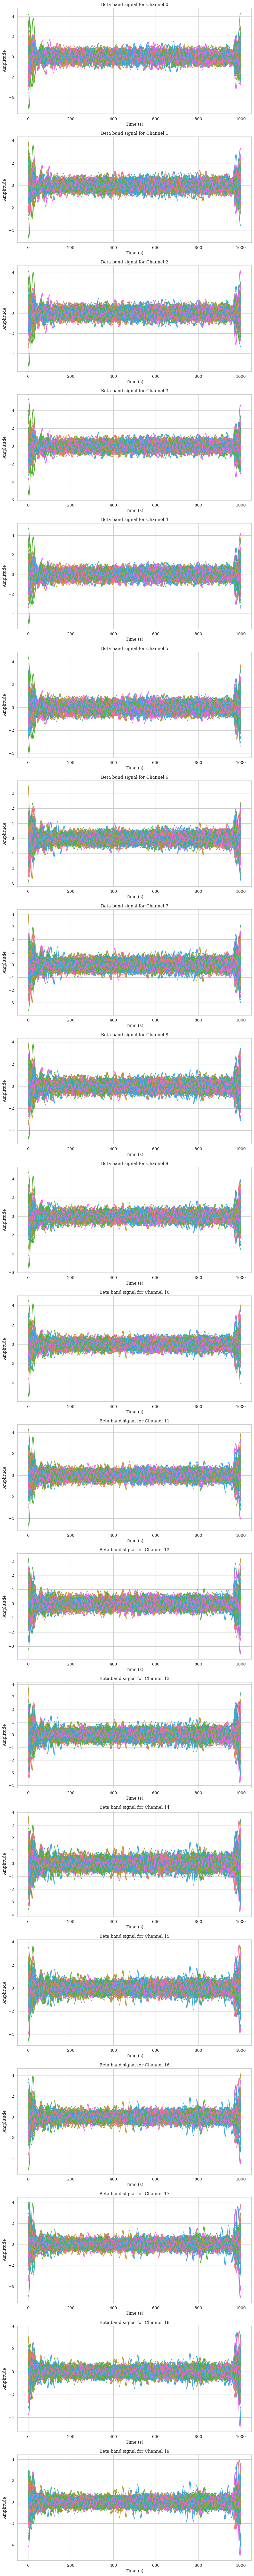

In [12]:
n_channels = 20
# n_channels = 1

fig, axs = plt.subplots(n_channels, 1, figsize=(10, 5*n_channels))

for ch in range(n_channels):
    for trial in np.where(y==1)[0]:
        axs[ch].plot(freq_band_eeg[trial]['Beta'][ch])

    axs[ch].set_title(f"Beta band signal for Channel {ch}")
    axs[ch].set_xlabel("Time (s)")
    axs[ch].set_ylabel("Amplitude")
    # axs[ch].set_ylim(-500, 500)

plt.tight_layout()
plt.show()

## Motor Imagery Dataset

In [32]:
import warnings

from mne.decoding import CSP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

import moabb


moabb.set_log_level("info")
warnings.filterwarnings("ignore")

### Instantiate Dataset

In [33]:
from moabb.datasets import BNCI2014_001, BNCI2015_001

dataset = BNCI2015_001()
dataset.subject_list = [1, 2, 3]

### Access EEG Recordings

In [17]:
sessions = dataset.get_data(subjects=[1])

100%|#####################################| 65.5M/65.5M [00:00<00:00, 22.3GB/s]
SHA256 hash of downloaded file: 2d1631084b40b6d1d4059449602d9e7f44cb8cbb5464b7bc204081d4c463e0d4
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|#####################################| 65.3M/65.3M [00:00<00:00, 62.3GB/s]
SHA256 hash of downloaded file: c1967542288f1081f933c89b0b2b5fd817cc73a130af848951fe15d8a904fc33
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [19]:
subject = 1
session_name = "0train"
run_name = "0"

sessions[subject]['0A']

{'0A': {'0': <RawArray | 14 x 1099541 (2147.5 s), ~117.5 MB, data loaded>},
 '1B': {'0': <RawArray | 14 x 1097390 (2143.3 s), ~117.2 MB, data loaded>}}

### Set Up Paradigm

In [20]:
dataset.paradigm

'imagery'

In [23]:
from moabb.paradigms import MotorImagery, LeftRightImagery 

paradigm = MotorImagery()

2024-07-25 12:08:35,264 WARNING MainThread moabb.paradigms.motor_imagery Choosing from all possible events


### Get data

In [24]:
X, labels, meta = paradigm.get_data(dataset=dataset, subjects=[1])
y = np.array([0 if label == "left_hand" else 1 for label in labels])

### Create Frequency Bands

In [26]:
# BNCI2015_001 first 3 seconds are reference, sfreq is 512 Hz
X.shape

(400, 13, 2561)

In [28]:
freq_band_eeg = []

for trial_data in X:
    coefficients, freqs = wavelet_transform(trial_data, 1024)

    bands = {
        'Delta': (0.5, 4),
        'Theta': (4, 8),
        'Alpha': (8, 13),
        'Beta': (13, 30),
        'Gamma': (30, 100),
        'High Gamma': (75, 150)
    }
    
    band_signals = {}
    for band, (low_freq, high_freq) in bands.items():
        # Find the indices of frequencies within the band
        idx_band = np.logical_and(freqs >= low_freq, freqs <= high_freq)
        band_signals[band] = coefficients[idx_band, :, :].mean(axis=0)
    
    freq_band_eeg.append(band_signals)

### Compute Gamma Power

In [29]:
gamma_power = []

for trial in range(len(freq_band_eeg)):
    gamma_power.append(freq_band_eeg[trial]['High Gamma'])

gamma_power = np.array(gamma_power)

In [31]:
X.shape[2]

2561

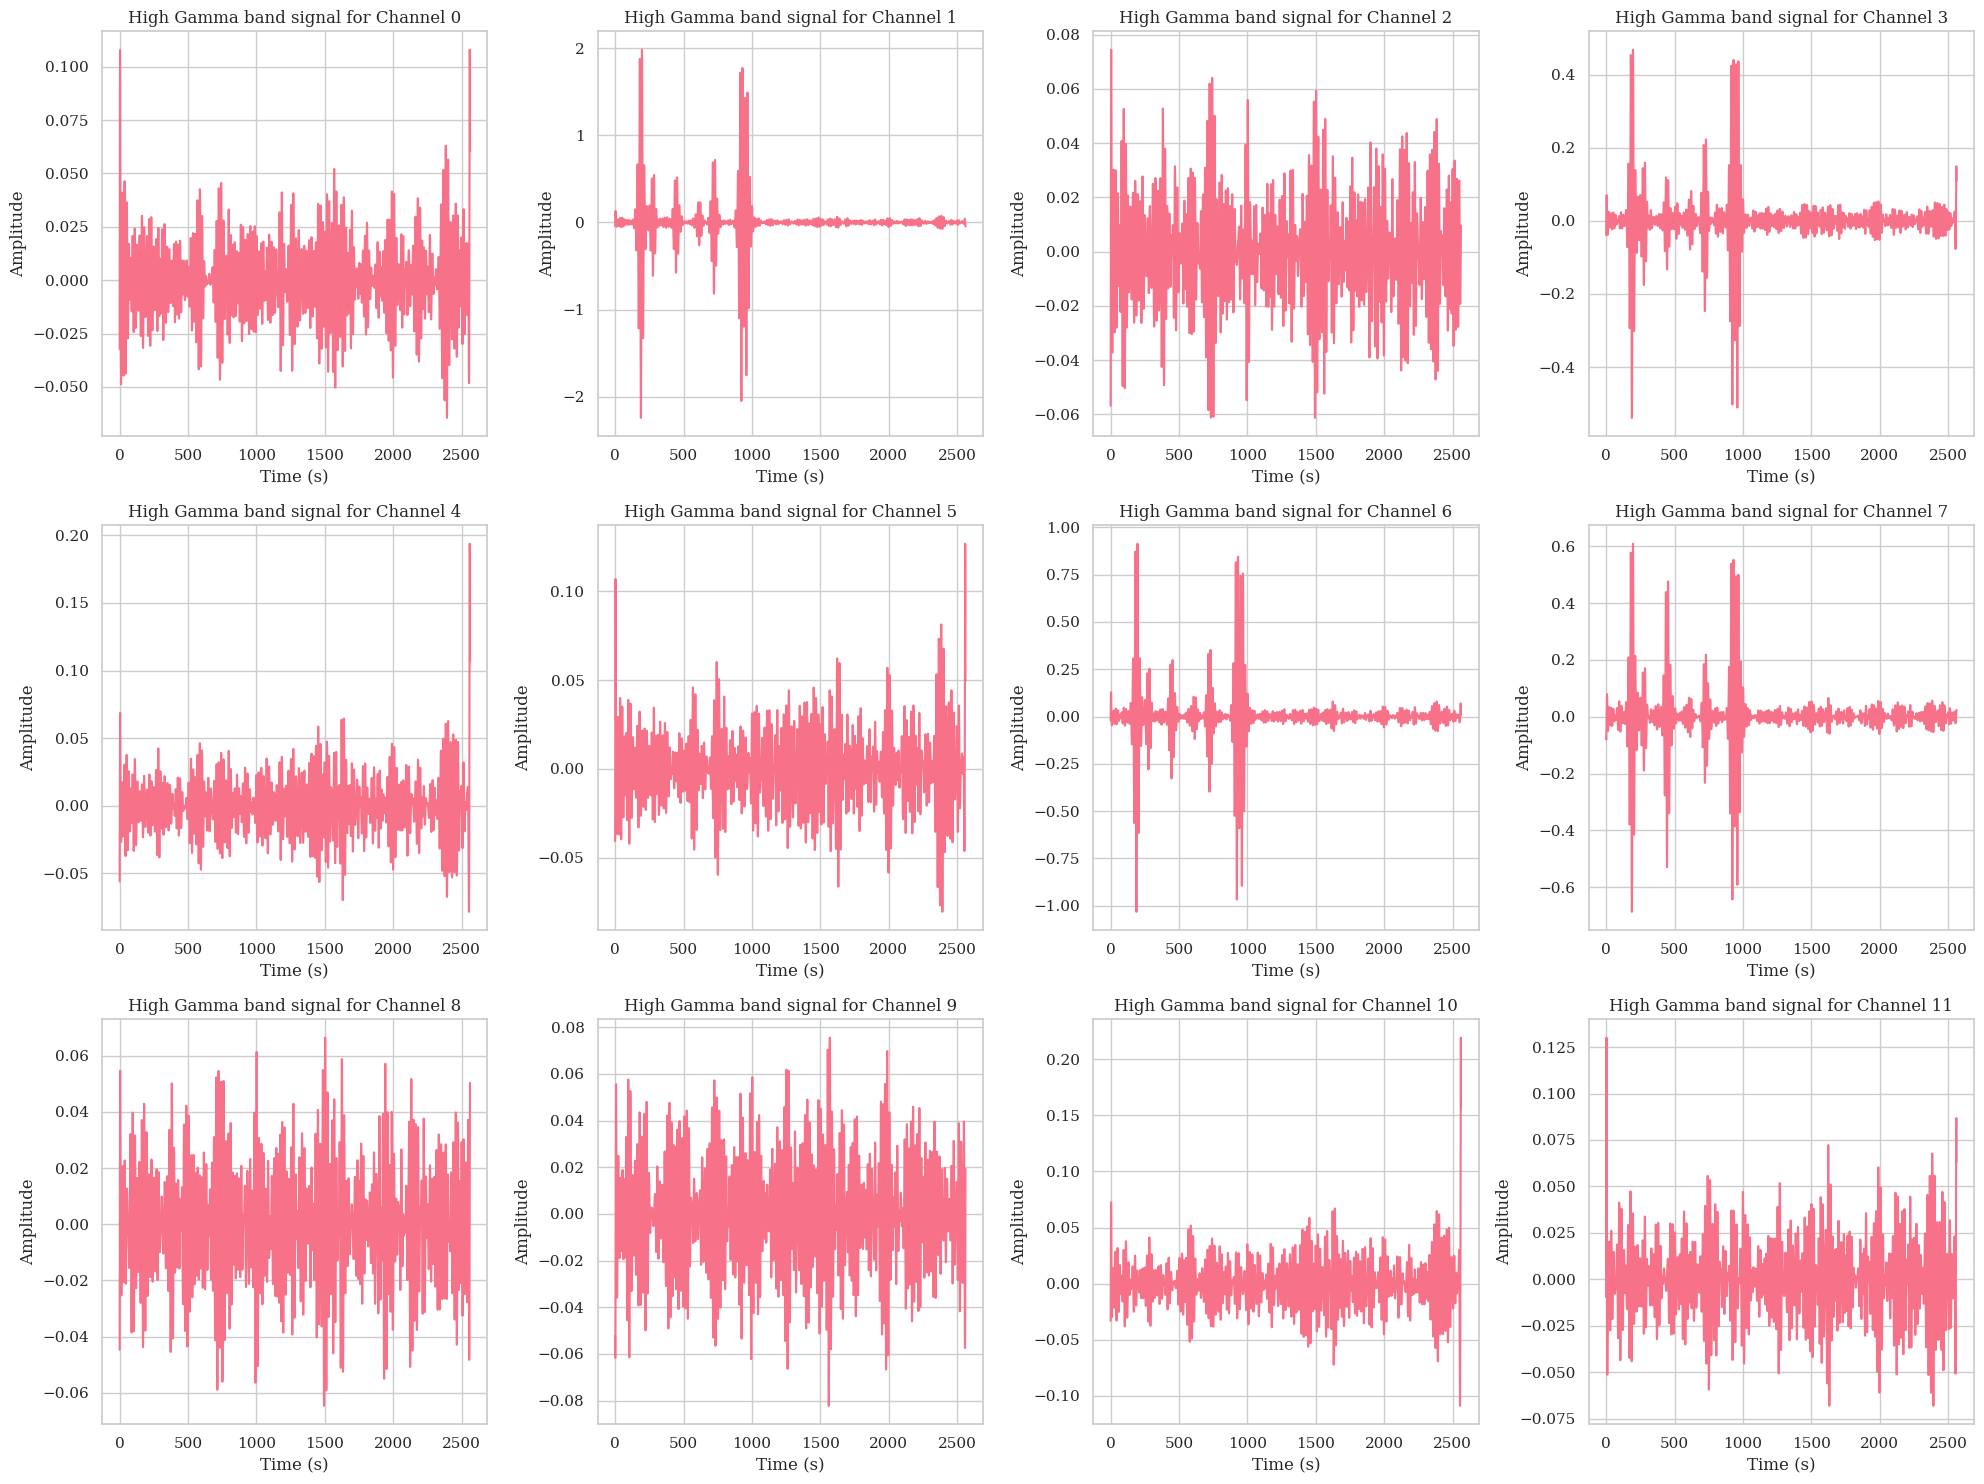

In [30]:
n_channels = X.shape[1]
mean_gamma_power = gamma_power[np.where(y==1)[0]].mean(axis=0)

n_cols = 4
n_rows = n_channels//n_cols


fig, axs = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

for i in range(n_rows):
    for j in range(n_cols):
        ch = n_cols*i+j
        axs[i, j].plot(mean_gamma_power[ch])

        axs[i, j].set_title(f"High Gamma band signal for Channel {ch}")
        axs[i, j].set_xlabel("Time (s)")
        axs[i, j].set_ylabel("Amplitude")
    
        xtick_positions = np.linspace(0, 4, num=4)
        # xtick_labels = np.round(np.linspace(0, t_win[0], num=4), 2)
        axs[i, j].set_xticks(xtick_positions)
        axs[i, j].set_xticklabels(xtick_labels)

plt.tight_layout()
plt.show()

### Create Pipeline

In [ ]:
pipeline = {}
pipeline["CSP+LDA"] = make_pipeline(CSP(n_components=8), LDA())

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline["CSP+LDA"], X, y, cv=5)
scores